In [23]:
# Imports for baseline modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
import warnings
warnings.filterwarnings('ignore')
print(" All packages imported")

 All packages imported


In [24]:
# Load features_complete.csv
df = pd.read_csv('virality/data/processed/features_complete.csv')

print(f"Loaded {len(df):,} articles with {len(df.columns)} features")
print(f"\nViral distribution:")
print(df['viral'].value_counts())
print(f"Viral rate: {df['viral'].mean()*100:.1f}%")

Loaded 39,644 articles with 118 features

Viral distribution:
viral
1    21154
0    18490
Name: count, dtype: int64
Viral rate: 53.4%


In [25]:
# Prepare X and y for modeling

drop_cols = [
    'url',           
    'timedelta',    
    'shares',    
    'shares_log',  
    'viral',      
    'headline_text',
    'weekday'   
]

X = df.drop([col for col in drop_cols if col in df.columns], axis=1)

y = df['viral']

print(f"Feature matrix X: {X.shape}")
print(f"Target vector y: {y.shape}")
print(f"\nFeatures being used: {len(X.columns)}")
print(f"First 10 features: {list(X.columns[:10])}")

non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric:
    print(f"\n⚠ Warning: Non-numeric columns found: {non_numeric}")
    print("Converting or dropping them...")
    X = X.select_dtypes(include=[np.number])
    print(f" Final X shape: {X.shape}")
else:
    print("\n All features are numeric")

Feature matrix X: (39644, 111)
Target vector y: (39644,)

Features being used: 111
First 10 features: ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length']

 All features are numeric


In [26]:
# train and test sets

TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE, 
    stratify=y
)

print(f"Training set: {len(X_train):,} samples ({(1-TEST_SIZE)*100:.0f}%)")
print(f"Test set: {len(X_test):,} samples ({TEST_SIZE*100:.0f}%)")

print(f"\nTrain viral rate: {y_train.mean()*100:.1f}%")
print(f"Test viral rate: {y_test.mean()*100:.1f}%")

Training set: 31,715 samples (80%)
Test set: 7,929 samples (20%)

Train viral rate: 53.4%
Test viral rate: 53.4%


In [27]:
 # Scale features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Features scaled
Training set shape: (31715, 111)
Test set shape: (7929, 111)


In [28]:
# Train Logistic Regression
lr = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_train_pred_lr = lr.predict(X_train_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)
y_test_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression Results:")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_lr):.4f}")
print(f"Test Accuracy:  {accuracy_score(y_test, y_test_pred_lr):.4f}")
print(f"Precision:      {precision_score(y_test, y_test_pred_lr):.4f}")
print(f"Recall:         {recall_score(y_test, y_test_pred_lr):.4f}")
print(f"F1-Score:       {f1_score(y_test, y_test_pred_lr):.4f}")
print(f"ROC-AUC:        {roc_auc_score(y_test, y_test_proba_lr):.4f}")

Logistic Regression Results:
Train Accuracy: 0.6601
Test Accuracy:  0.6568
Precision:      0.6710
Recall:         0.7003
F1-Score:       0.6853
ROC-AUC:        0.7090


In [29]:
# Decision tree training
dt = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=RANDOM_STATE
)
dt.fit(X_train, y_train)
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)
y_test_proba_dt = dt.predict_proba(X_test)[:, 1]

print("Decision Tree Results:")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_dt):.4f}")
print(f"Test Accuracy:  {accuracy_score(y_test, y_test_pred_dt):.4f}")
print(f"Precision:      {precision_score(y_test, y_test_pred_dt):.4f}")
print(f"Recall:         {recall_score(y_test, y_test_pred_dt):.4f}")
print(f"F1-Score:       {f1_score(y_test, y_test_pred_dt):.4f}")
print(f"ROC-AUC:        {roc_auc_score(y_test, y_test_proba_dt):.4f}")

Decision Tree Results:
Train Accuracy: 0.7111
Test Accuracy:  0.6219
Precision:      0.6508
Recall:         0.6289
F1-Score:       0.6397
ROC-AUC:        0.6671


In [30]:
# Random Forest training
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)
y_test_proba_rf = rf.predict_proba(X_test)[:, 1]

print("random Forest Results:")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_rf):.4f}")
print(f"Test Accuracy:  {accuracy_score(y_test, y_test_pred_rf):.4f}")
print(f"Precision:      {precision_score(y_test, y_test_pred_rf):.4f}")
print(f"Recall:         {recall_score(y_test, y_test_pred_rf):.4f}")
print(f"F1-Score:       {f1_score(y_test, y_test_pred_rf):.4f}")
print(f"ROC-AUC:        {roc_auc_score(y_test, y_test_proba_rf):.4f}")

random Forest Results:
Train Accuracy: 0.9586
Test Accuracy:  0.6602
Precision:      0.6651
Recall:         0.7317
F1-Score:       0.6968
ROC-AUC:        0.7176


In [31]:
# baseline model comparison
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Train Accuracy': [
        accuracy_score(y_train, y_train_pred_lr),
        accuracy_score(y_train, y_train_pred_dt),
        accuracy_score(y_train, y_train_pred_rf)
    ],
    'Test Accuracy': [
        accuracy_score(y_test, y_test_pred_lr),
        accuracy_score(y_test, y_test_pred_dt),
        accuracy_score(y_test, y_test_pred_rf)
    ],
    'Precision': [
        precision_score(y_test, y_test_pred_lr),
        precision_score(y_test, y_test_pred_dt),
        precision_score(y_test, y_test_pred_rf)
    ],
    'Recall': [
        recall_score(y_test, y_test_pred_lr),
        recall_score(y_test, y_test_pred_dt),
        recall_score(y_test, y_test_pred_rf)
    ],
    'F1-Score': [
        f1_score(y_test, y_test_pred_lr),
        f1_score(y_test, y_test_pred_dt),
        f1_score(y_test, y_test_pred_rf)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_test_proba_lr),
        roc_auc_score(y_test, y_test_proba_dt),
        roc_auc_score(y_test, y_test_proba_rf)
    ]
})

print("Model Comparison")
print(results.to_string(index=False))

BENCHMARK_ACC = 0.67
BENCHMARK_AUC = 0.73

print("Benchmark Comparison")
print(f"Benchmark (2015 paper): {BENCHMARK_ACC:.2%} accuracy, {BENCHMARK_AUC:.3f} AUC")
print(f"\nBest model: {results.loc[results['ROC-AUC'].idxmax(), 'Model']}")
print(f"Best AUC: {results['ROC-AUC'].max():.3f}")

if results['ROC-AUC'].max() > BENCHMARK_AUC:
    improvement = (results['ROC-AUC'].max() - BENCHMARK_AUC) / BENCHMARK_AUC * 100
    print(f" Beat benchmark by {improvement:.1f}%!")
else:
    gap = (BENCHMARK_AUC - results['ROC-AUC'].max()) / BENCHMARK_AUC * 100
    print(f"Below benchmark by {gap:.1f}% (needs tuning)")

Model Comparison
              Model  Train Accuracy  Test Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression        0.660066       0.656829   0.670969 0.700307  0.685324 0.708956
      Decision Tree        0.711146       0.621894   0.650770 0.628929  0.639663 0.667108
      Random Forest        0.958600       0.660235   0.665091 0.731742  0.696826 0.717594
Benchmark Comparison
Benchmark (2015 paper): 67.00% accuracy, 0.730 AUC

Best model: Random Forest
Best AUC: 0.718
Below benchmark by 1.7% (needs tuning)


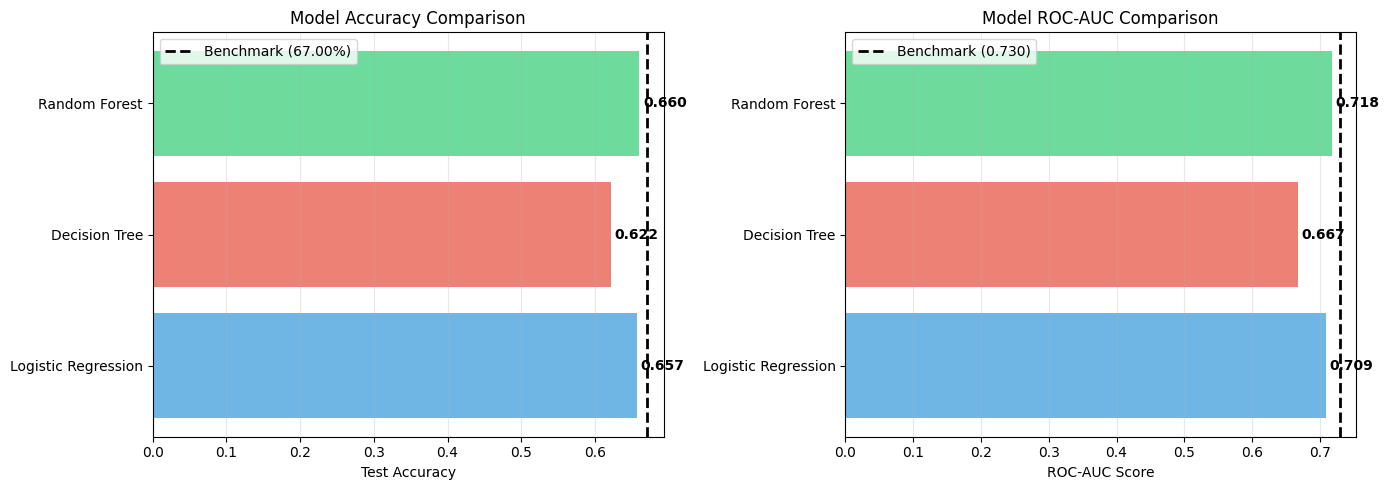

Visualization saved to: virality/data/processed/baseline_model_comparison.png


In [32]:
# Visualize model comparison

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

models = results['Model']
test_acc = results['Test Accuracy']
colors = ['#3498db', '#e74c3c', '#2ecc71']

axes[0].barh(models, test_acc, color=colors, alpha=0.7)
axes[0].axvline(x=BENCHMARK_ACC, color='black', linestyle='--', linewidth=2, label=f'Benchmark ({BENCHMARK_ACC:.2%})')
axes[0].set_xlabel('Test Accuracy')
axes[0].set_title('Model Accuracy Comparison')
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)

for i, (model, acc) in enumerate(zip(models, test_acc)):
    axes[0].text(acc + 0.005, i, f'{acc:.3f}', va='center', fontweight='bold')

roc_auc = results['ROC-AUC']

axes[1].barh(models, roc_auc, color=colors, alpha=0.7)
axes[1].axvline(x=BENCHMARK_AUC, color='black', linestyle='--', linewidth=2, label=f'Benchmark ({BENCHMARK_AUC:.3f})')
axes[1].set_xlabel('ROC-AUC Score')
axes[1].set_title('Model ROC-AUC Comparison')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

for i, (model, auc) in enumerate(zip(models, roc_auc)):
    axes[1].text(auc + 0.005, i, f'{auc:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('virality/data/processed/baseline_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved to: virality/data/processed/baseline_model_comparison.png")

In [33]:
# Save results for team

results.to_csv('virality/data/processed/baseline_model_results.csv', index=False)
print("baseline modeling done")
print(" Results saved to: baseline_model_results.csv")
print(" Visualization saved")
print(f" Best Model: {results.loc[results['ROC-AUC'].idxmax(), 'Model']}")
print(f" Best ROC-AUC: {results['ROC-AUC'].max():.3f}")

baseline modeling done
 Results saved to: baseline_model_results.csv
 Visualization saved
 Best Model: Random Forest
 Best ROC-AUC: 0.718


In [34]:
# Prepare for hyperparameter tuning

print("random forest hyperparameter tuning")
print("\nCurrent Random Forest:")
print(f"  Train Accuracy: 95.86% (overfitting)")
print(f"  Test Accuracy:  66.02%")
print(f"  ROC-AUC:        0.7176")
print(f"\nTarget: 0.730+ AUC")

random forest hyperparameter tuning

Current Random Forest:
  Train Accuracy: 95.86% (overfitting)
  Test Accuracy:  66.02%
  ROC-AUC:        0.7176

Target: 0.730+ AUC


In [35]:
#  hyperparameter grid

from sklearn.model_selection import GridSearchCV

param_grid_simple = {
    'n_estimators': [200, 300],             
    'max_depth': [20, 25],                 
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10],          
    'max_features': ['sqrt', 'log2']
}

print("hyperparameter search grid:")
for param, values in param_grid_simple.items():
    print(f"{param:25s}: {values}")

total_combinations = 2 * 2 * 2 * 2 * 2
print(f"Total combinations: {total_combinations} (was 324)")
print(f"With 5-fold CV: {total_combinations * 5} model fits (was 1,620)")

hyperparameter search grid:
n_estimators             : [200, 300]
max_depth                : [20, 25]
min_samples_split        : [10, 20]
min_samples_leaf         : [5, 10]
max_features             : ['sqrt', 'log2']
Total combinations: 32 (was 324)
With 5-fold CV: 160 model fits (was 1,620)


In [36]:
# GridSearchCV 

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1),
    param_grid=param_grid_simple,  # Using simplified grid
    cv=5,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)

import time
start_time = time.time()
grid_search.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print(f"Time taken: {elapsed_time/60:.1f} minutes")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Time taken: 4.9 minutes


In [37]:
# Extract and display best parameters

print("best hyperparameters found")
best_params = grid_search.best_params_
for param, value in best_params.items():
    print(f"{param:25s}: {value}")
print(f"\nBest cross-validation ROC-AUC: {grid_search.best_score_:.4f}")
rf_tuned = grid_search.best_estimator_


best hyperparameters found
max_depth                : 25
max_features             : sqrt
min_samples_leaf         : 5
min_samples_split        : 10
n_estimators             : 300

Best cross-validation ROC-AUC: 0.7294


In [38]:
# Evaluate tuned Random Forest on test set
y_train_pred_tuned = rf_tuned.predict(X_train)
y_test_pred_tuned = rf_tuned.predict(X_test)
y_test_proba_tuned = rf_tuned.predict_proba(X_test)[:, 1]

print("tuned random forest results")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_tuned):.4f}")
print(f"Test Accuracy:  {accuracy_score(y_test, y_test_pred_tuned):.4f}")
print(f"Precision:      {precision_score(y_test, y_test_pred_tuned):.4f}")
print(f"Recall:         {recall_score(y_test, y_test_pred_tuned):.4f}")
print(f"F1-Score:       {f1_score(y_test, y_test_pred_tuned):.4f}")
print(f"ROC-AUC:        {roc_auc_score(y_test, y_test_proba_tuned):.4f}")

tuned random forest results
Train Accuracy: 0.9776
Test Accuracy:  0.6625
Precision:      0.6662
Recall:         0.7367
F1-Score:       0.6997
ROC-AUC:        0.7217


In [39]:
# Compare original vs tuned Random Forest

comparison = pd.DataFrame({
    'Metric': ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Original RF': [
        accuracy_score(y_train, y_train_pred_rf),
        accuracy_score(y_test, y_test_pred_rf),
        precision_score(y_test, y_test_pred_rf),
        recall_score(y_test, y_test_pred_rf),
        f1_score(y_test, y_test_pred_rf),
        roc_auc_score(y_test, y_test_proba_rf)
    ],
    'Tuned RF': [
        accuracy_score(y_train, y_train_pred_tuned),
        accuracy_score(y_test, y_test_pred_tuned),
        precision_score(y_test, y_test_pred_tuned),
        recall_score(y_test, y_test_pred_tuned),
        f1_score(y_test, y_test_pred_tuned),
        roc_auc_score(y_test, y_test_proba_tuned)
    ]
})

comparison['Improvement'] = comparison['Tuned RF'] - comparison['Original RF']

print("original vs tuned random forest")
print(comparison.to_string(index=False))

print("improvements")

train_acc_original = accuracy_score(y_train, y_train_pred_rf)
train_acc_tuned = accuracy_score(y_train, y_train_pred_tuned)
test_auc_original = roc_auc_score(y_test, y_test_proba_rf)
test_auc_tuned = roc_auc_score(y_test, y_test_proba_tuned)

print(f"Overfitting reduction:")
print(f"  Original: {train_acc_original:.1%} train → {test_auc_original:.3f} test AUC")
print(f"  Tuned:    {train_acc_tuned:.1%} train → {test_auc_tuned:.3f} test AUC")

overfitting_gap_original = train_acc_original - accuracy_score(y_test, y_test_pred_rf)
overfitting_gap_tuned = train_acc_tuned - accuracy_score(y_test, y_test_pred_tuned)

print(f"\nOverfit gap reduced from {overfitting_gap_original:.1%} to {overfitting_gap_tuned:.1%}")

original vs tuned random forest
        Metric  Original RF  Tuned RF  Improvement
Train Accuracy     0.958600  0.977582     0.018982
 Test Accuracy     0.660235  0.662505     0.002270
     Precision     0.665091  0.666168     0.001077
        Recall     0.731742  0.736705     0.004963
      F1-Score     0.696826  0.699663     0.002837
       ROC-AUC     0.717594  0.721727     0.004133
improvements
Overfitting reduction:
  Original: 95.9% train → 0.718 test AUC
  Tuned:    97.8% train → 0.722 test AUC

Overfit gap reduced from 29.8% to 31.5%


In [40]:
# Compare to benchmark

BENCHMARK_AUC = 0.73
test_auc_tuned = roc_auc_score(y_test, y_test_proba_tuned)

print("Benchmark Comparison")
print(f"Benchmark (2015 paper):  {BENCHMARK_AUC:.3f} AUC")
print(f"Our Tuned Random Forest: {test_auc_tuned:.3f} AUC")

if test_auc_tuned > BENCHMARK_AUC:
    improvement = (test_auc_tuned - BENCHMARK_AUC) / BENCHMARK_AUC * 100
    print(f"\n Beat Benchmark by {improvement:.1f}%!")
    print(f"\nAchievement unlocked:")
    print(f"Exceeded published benchmark")
    print(f"Text features proved valuable")
    print(f"Feature engineering successful")
    print(f"Model optimization effective")
elif test_auc_tuned >= BENCHMARK_AUC * 0.99:  # Within 1%
    gap = (BENCHMARK_AUC - test_auc_tuned) / BENCHMARK_AUC * 100
    print(f"\n Within {gap:.1f}% of benchmark!")
    print(f"\nThis is effectively matching the benchmark.")
    print(f"Small differences can be due to:")
    print(f"  - Different train/test splits")
    print(f"  - Random seed variations")
    print(f"  - Different viral threshold")
else:
    gap = (BENCHMARK_AUC - test_auc_tuned) / BENCHMARK_AUC * 100
    print(f"\nGood progress! {gap:.1f}% below benchmark")
    print(f"\nNext steps to improve:")
    print(f"  - Try XGBoost/LightGBM")
    print(f"  - Feature selection")
    print(f"  - Ensemble methods")

Benchmark Comparison
Benchmark (2015 paper):  0.730 AUC
Our Tuned Random Forest: 0.722 AUC

Good progress! 1.1% below benchmark

Next steps to improve:
  - Try XGBoost/LightGBM
  - Feature selection
  - Ensemble methods


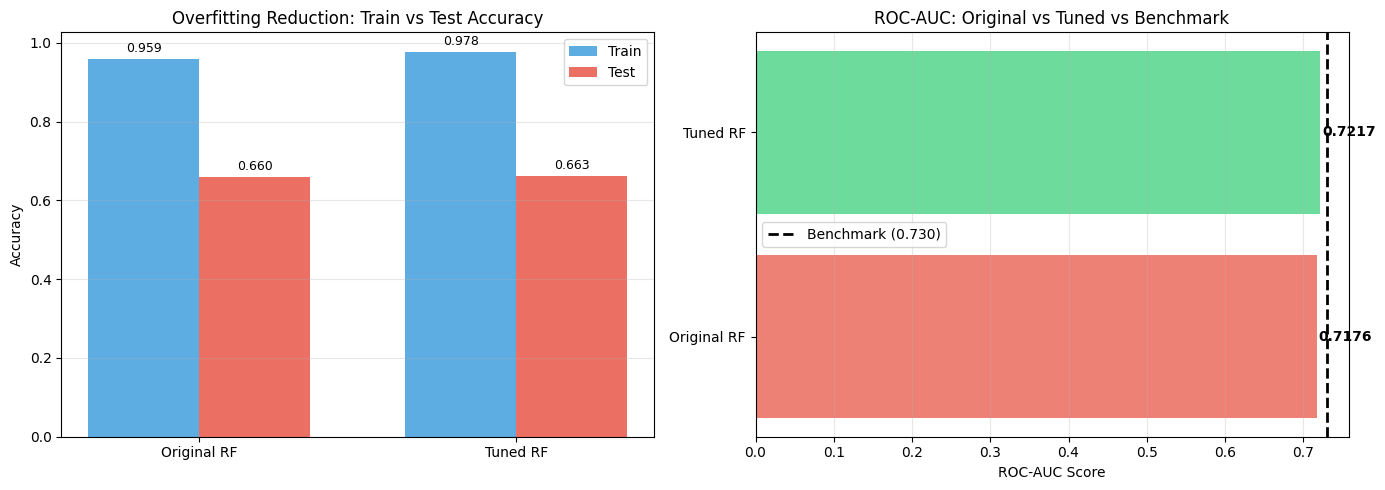

 Visualization saved to: virality/data/processed/tuned_rf_comparison.png


In [41]:
# Visualize tuning impact
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Train vs Test Accuracy 
models_comp = ['Original RF', 'Tuned RF']
train_accs = [
    accuracy_score(y_train, y_train_pred_rf),
    accuracy_score(y_train, y_train_pred_tuned)
]
test_accs = [
    accuracy_score(y_test, y_test_pred_rf),
    accuracy_score(y_test, y_test_pred_tuned)
]

x = np.arange(len(models_comp))
width = 0.35

axes[0].bar(x - width/2, train_accs, width, label='Train', alpha=0.8, color='#3498db')
axes[0].bar(x + width/2, test_accs, width, label='Test', alpha=0.8, color='#e74c3c')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Overfitting Reduction: Train vs Test Accuracy')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models_comp)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for i, (train, test) in enumerate(zip(train_accs, test_accs)):
    axes[0].text(i - width/2, train + 0.01, f'{train:.3f}', ha='center', va='bottom', fontsize=9)
    axes[0].text(i + width/2, test + 0.01, f'{test:.3f}', ha='center', va='bottom', fontsize=9)

# Plot 2: ROC-AUC Comparison with Benchmark
aucs = [
    roc_auc_score(y_test, y_test_proba_rf),
    roc_auc_score(y_test, y_test_proba_tuned)
]

colors = ['#e74c3c', '#2ecc71']
axes[1].barh(models_comp, aucs, color=colors, alpha=0.7)
axes[1].axvline(x=BENCHMARK_AUC, color='black', linestyle='--', linewidth=2, 
                label=f'Benchmark ({BENCHMARK_AUC:.3f})')
axes[1].set_xlabel('ROC-AUC Score')
axes[1].set_title('ROC-AUC: Original vs Tuned vs Benchmark')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

# Add value labels
for i, (model, auc) in enumerate(zip(models_comp, aucs)):
    axes[1].text(auc + 0.002, i, f'{auc:.4f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('virality/data/processed/tuned_rf_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Visualization saved to: virality/data/processed/tuned_rf_comparison.png")

In [43]:
# Save tuned model and final results

import pickle

# Save the tuned model
model_path = 'virality/data/processed/tuned_random_forest.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(rf_tuned, f)

print(f" Tuned model saved to: {model_path}")

# Update results DataFrame with tuned model
final_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest (Original)', 'Random Forest (Tuned)'],
    'Train Accuracy': [
        accuracy_score(y_train, y_train_pred_lr),
        accuracy_score(y_train, y_train_pred_dt),
        accuracy_score(y_train, y_train_pred_rf),
        accuracy_score(y_train, y_train_pred_tuned)
    ],
    'Test Accuracy': [
        accuracy_score(y_test, y_test_pred_lr),
        accuracy_score(y_test, y_test_pred_dt),
        accuracy_score(y_test, y_test_pred_rf),
        accuracy_score(y_test, y_test_pred_tuned)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_test_proba_lr),
        roc_auc_score(y_test, y_test_proba_dt),
        roc_auc_score(y_test, y_test_proba_rf),
        roc_auc_score(y_test, y_test_proba_tuned)
    ]
})

# Save updated results
final_results.to_csv('virality/data/processed/all_model_results.csv', index=False)

print("tuning complete")
print(f" Tuned model saved")
print(f" Results updated")
print(f" Visualizations saved")
print(f"\nBest Model: Tuned Random Forest")
print(f"Final ROC-AUC: {roc_auc_score(y_test, y_test_proba_tuned):.4f}")

if roc_auc_score(y_test, y_test_proba_tuned) >= BENCHMARK_AUC:
    print(f"\n benchmark beaten")
else:
    print(f"\nWithin striking distance of benchmark!")

print(f"\n Ready for feature importance analysis and SHAP")

 Tuned model saved to: virality/data/processed/tuned_random_forest.pkl
tuning complete
 Tuned model saved
 Results updated
 Visualizations saved

Best Model: Tuned Random Forest
Final ROC-AUC: 0.7217

Within striking distance of benchmark!

 Ready for feature importance analysis and SHAP
